# PREDICTION OF HEART DISEASE USING MACHINE LEARNING METHODOLOGIES

**We're going to take the following approach:**

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

**In a statement,**

**Given clinical parameters about a patient, can we predict whether or not they have heart disease?**

## 2. Data

- The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

- There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

- If we can reach 88-90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## 4. Features

- This is where you'll get different information about each of the features in your data.You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. **age** - age in years

2. **sex** - (1 = male; 0 = female)

3. **cp** - chest pain type
- **0: Typical angina:** chest pain related decrease blood supply to the heart
- **1: Atypical angina:** chest pain not related to heart
- **2: Non-anginal pain:** typically esophageal spasms (non heart related)
- **3: Asymptomatic:** chest pain not showing signs of disease

**4. trestbps -** resting blood pressure (in mm Hg on admission to the hospital)
**anything above 130-140 is typically cause for concern**

**5. chol -** serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
**above 200 is cause for concern**

**6. fbs -** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
**'>126' mg/dL signals diabetes**

**7. restecg -** resting electrocardiographic results
- **0: Nothing to note**
- **1: ST-T Wave abnormality**
  - can range from mild symptoms to severe problems
  - signals non-normal heart beat
- **2: Possible or definite left ventricular hypertrophy**
  - Enlarged heart's main pumping chamber

**8. thalach -** maximum heart rate achieved

**9. exang -** exercise induced angina (1 = yes; 0 = no)

**10. oldpeak -** ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**11. slope -** the slope of the peak exercise ST segment
- **0: Upsloping:** better heart rate with excercise (uncommon)
- **1: Flatsloping:** minimal change (typical healthy heart)
- **2: Downslopins:** signs of unhealthy heart

**12. ca -** number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

**13. thal -** thalium stress result
- **1,3:** normal
- **6:** fixed defect: used to be defect but ok now
- **7:** reversable defect: no proper blood movement when excercising

**14. target -** have disease or not (1=yes, 0=no) (= the predicted attribute)

## EXPLORATORY DATA ANALYSIS:

- Performing data analysis on the dataset is crucial for building an accurate model to predict heart disease.


- It helps in understanding the data's characteristics, identifying patterns, and gaining insights into the relationships between different features. 


- This analysis aids in selecting relevant features, handling missing data, solving multicollinearity problems, dealing with outliers, and choosing appropriate machine learning algorithms.

## Models Considered:

We have a binary classification Problem since we are trying to predict whether or not a individual has heart disease or not.
Based on this problem Statement we are considering the following models.

- Logistic Regression
- Random Forrest
- k-Nearest Neighbors (k-NN)
- DNN(Direct Neural Network)

## Preparing the tools:

- For data analysis and manipulation, we'll utilise pandas, Matplotlib, and NumPy. 

- Data visualisation is done using the Seaborn Package.

In [107]:
# Import all the tools we need
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
#For this analysis we are considering 4 models: Logistic,K-means clustering,Random Forest Classifier,DNN.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

## Load data

In [108]:
#Loading the csv file necessary for analysis.
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

**INFERENCE**
- From the above output we can infer that the dataset has 303 observations and 14 variables.

## Data Exploration (exploratory data analysis (ie) EDA)

**The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.**

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Is there any outliers and why should we care about them?
5. How can you add, change or remove features to get more out of your data
6. Exploring Multicollinearity problems
7. Deciding the suitable evaluation metrics for evaluating a model.

In [109]:
#Printing the first 5 rows to get a general outlook of the data:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Deciding the suitable evaluation metrics for evaluating a model:

- If we are dealing with a balanced dataset, accuracy might be a suitable methodology for evaluation.
- If we are dealing with an imbalanced dataset,one class significantly outnumbers the other(s), making the model prone to biased predictions. The standard accuracy metric might not be suitable as it could be misleading due to the class imbalance.
- In such cases Precision,Recall (Sensitivity or True Positive Rate),F1-score,.. etc

Text(0, 0.5, 'Count')

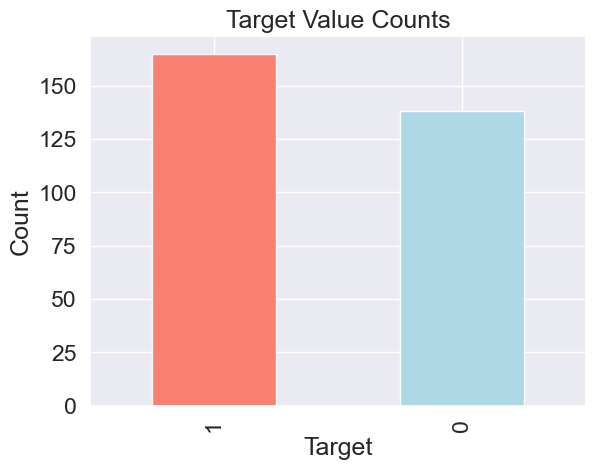

In [110]:
#Bar plot for visualising frequency of individuals with or without disease.
plot = df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plot.set_title("Target Value Counts") 
plot.set_xlabel("Target")  # Add this line to set the x label
plot.set_ylabel("Count")  # Add this line to set the y label

**Inference:**

- From the above output we can infer that the dataset is almost balanced there are equal numbers of "with heart disease" and "without heart disease" outputs.

- In such cases both Accuracy, Sensitivity might be a proper evaluation metric.

## Missing Values:

- Checking for missing values in a dataset is an essential step in the data analysis process. Dealing with missing values appropriately is crucial for building accurate and reliable models. Here are some reasons why you should check for missing values in a dataset:

- Model Performance: Missing values can impact model performance, especially when using machine learning algorithms. Many machine learning algorithms cannot handle missing values directly, and their presence can lead to errors or biased predictions.

- Bias and Generalization: Missing values can introduce bias in the dataset, leading to inaccurate model predictions. Addressing missing values properly ensures better generalization of the model to new, unseen data.

- Feature Selection: Features with a significant number of missing values might not be useful for modeling and can be candidates for removal from the dataset during feature selection

- So it is necessary to handle missing values using suitable measures like replacing the missing values with mean , median, mode or using matrix completon method, or by just removing the missing values. 

In [111]:
# Are there any missing values?
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Inference:**

- From the above output we can infer that there are no missing values so we can proceed with the data for modelling.

## DATA DISTRIBUTION:

- Knowing the distribution of the data helps in selecting appropriate modeling techniques. For example, if the data is highly skewed, certain models might not be suitable or may require transformations.

In [149]:
#Numerical summary of the variables.
print("Summary Statistics:")
df.describe()

Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Inference:**

- From the above output we can infer that the mean and the median values are almost equal for all the numerical variables which states that the data is normally distributed.

- Since the data is normally distributed logistic,Random forrest are more suitable models. But For this analysis we are consideing other models like KNN which is more suitable for skewed data.

## Finding the features necessary for modelling:

**Is Sex a Important Feature:**

In [113]:
#Findig number of males and females having heart disease.
pd.crosstab(df.target, df.sex)


sex,0,1
target,,
0,24,114
1,72,93


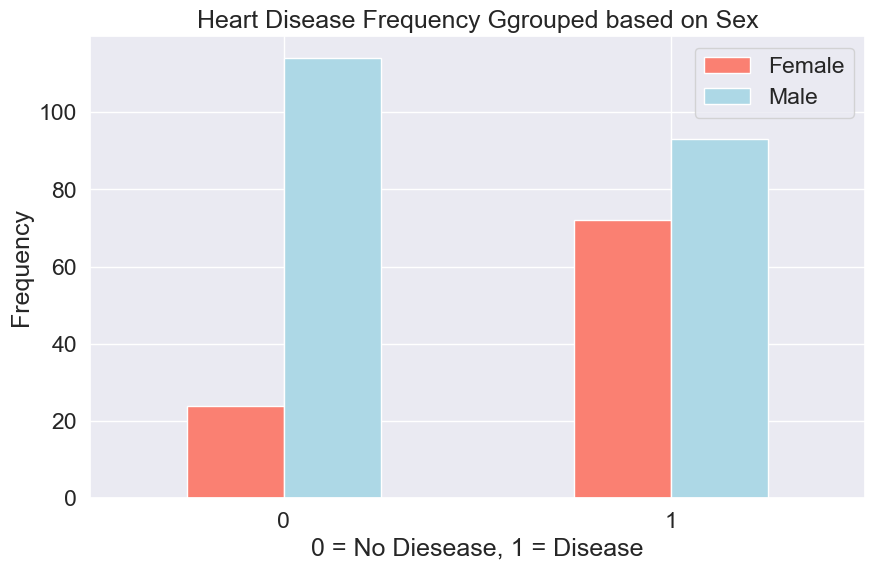

In [153]:
# Create a plot of identifying people with heart dsease grouped on sex
pd.crosstab(df.target, df.sex).plot(kind="bar",
 figsize=(10, 6),
 color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Ggrouped based on Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);


**Inference:**

- From the above output we can infer that the individuals diagnosed with heart disease or not differs based on sex.

- So Sex can be considered as a important factor for predicting heart disease.

**Relationship between Age & Max Heart Rate for Heart Disease:**

- By investigating the relationship between age and maximum heart rate, we gain valuable insights into the role of age in heart disease risk and the potential impact of maximum heart rate as a predictor. 
- These insights can inform the modeling process, improve model performance, and lead to more effective heart disease prediction and patient care.

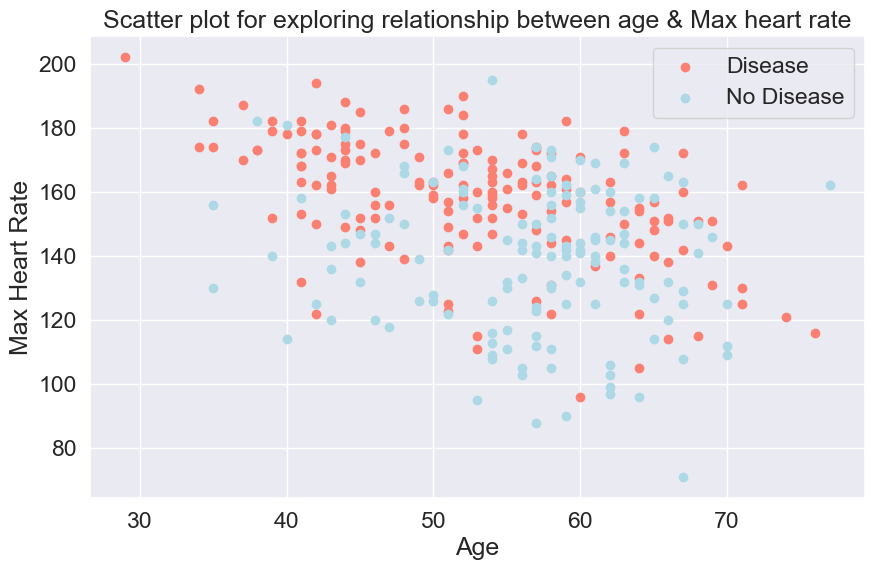

In [154]:
 # Create another figure
plt.figure(figsize=(10, 6))
# Scatter with postivie examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")

# Add some helpful info
plt.title("Scatter plot for exploring relationship between age & Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

**Intepration:**

- From the scatter plot we can infer that the maximum heart rate decreases with age.
- As the Age increases the maximum heart rate decreases. This states that there is a relationship between the age and the maximum heart rate.
- Understanding the relationship between age and maximum heart rate can reveal any interaction effects between these two predictors. Interaction effects occur when the combined effect of two predictors is different from their individual effects. Identifying such interactions can provide nuanced insights into how age and maximum heart rate jointly impact heart disease risk.

## Heart Disease Frequency per Chest Pain Type

**Is Chest Pain Type a Important Feature:**

- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [155]:
#Tabulation of number of individuals diagnosed with heart disease based on Chest pain
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


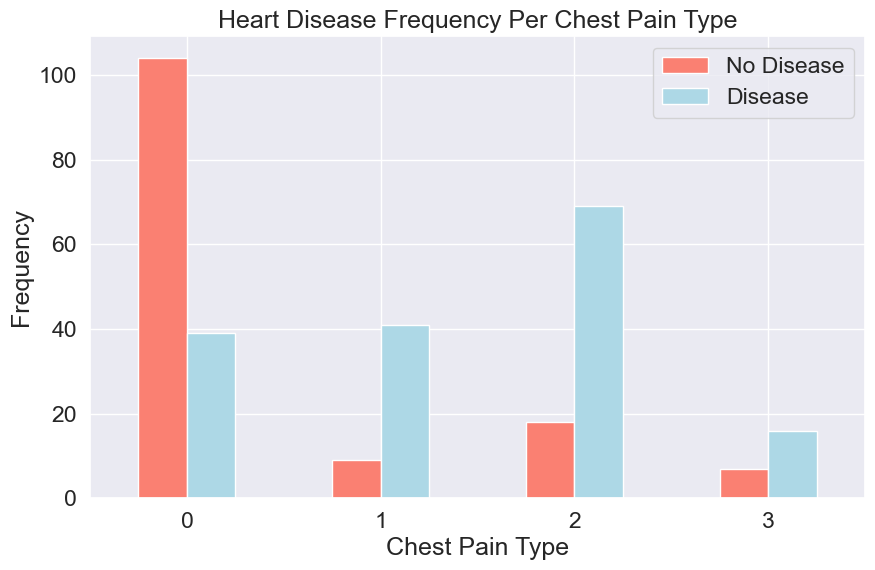

In [156]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
 figsize=(10, 6),
 color=["salmon", "lightblue"])
# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);


**Inference:**
- From the above output we can infer that Different chest pain types are associated different number of people diagnoes with heart disease.

- Chest pain type 1 & 2 are associated with heart diseases more as compared to other types. This states the Heart disease diagnostic is associated with the chest pain type. 

- Therefore Chest pain type is an important factor to be considered while predicting heart disease.

## Exploring Multicollinearity Problems:



- Multicollinearity leads to inflated standard errors of regression coefficients. When predictor variables are highly correlated, it becomes challenging for the regression model to estimate the unique contribution of each variable, resulting in imprecise coefficient estimates.

- Misleading Variable Importance: Multicollinearity can lead to misleading interpretations of variable importance. Some predictors may appear to have strong effects on the response variable, but their significance might be due to their correlation with other important predictors rather than their true individual impact.

- Overfitting: Multicollinearity can result in overfitting, where the model performs well on the training data but poorly on new, unseen data. The model might capture noise or random variations in the data rather than the true underlying relationships.

**Correlation Table:**

From the correlation table we can infer the relationship between variables which are used as predictor variables in a model.
Higher the correlation between variables higher the problem of multicollinearity between the variables. 

Text(0.5, 1.0, 'Correlation Matrix')

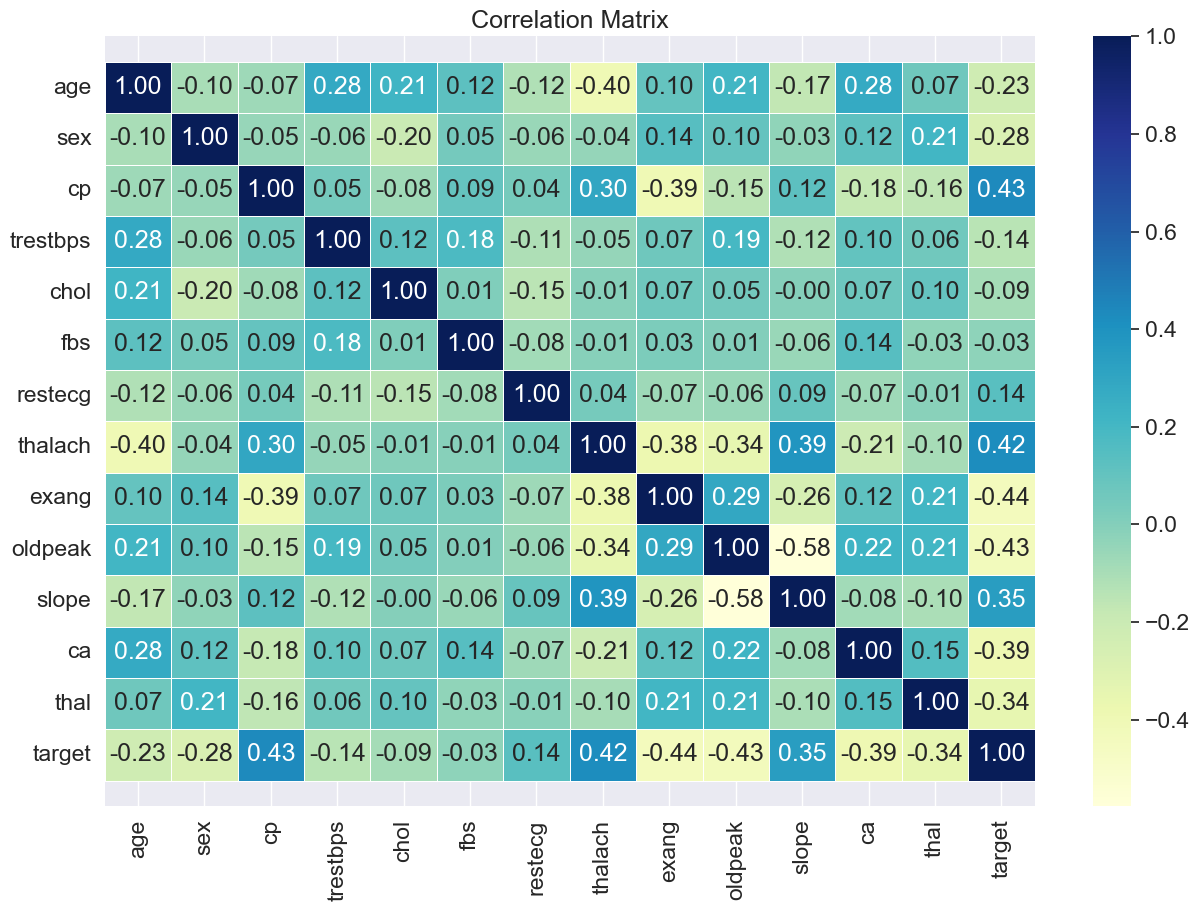

In [119]:
# Let's visualise correlation matrix and make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
 annot=True,
 linewidths=0.5,
 fmt=".2f",
 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Correlation Matrix")

**Inference:**

- 0.8 is a commonly used threshold for detecting multicollinearity. From the above output we can infer that there is not high relationship between the variables and hence they are independent variables. So the problem of multicollinearity doesn't exist.

- Additionally, multicollinearity is not solely determined by correlation values; it can also be assessed through methods like variance inflation factor (VIF) and condition number.

- If multicollinearity is detected, it's advisable to consider methods to address the issue, such as feature selection, principal component analysis (PCA) for dimensionality reduction, or regularization techniques like ridge regression or lasso regression. These methods can help mitigate the effects of multicollinearity and improve the model's stability and interpretability.

## Modelling:

For modelling the data we have seperated the response variables from the predictor variables.

In [120]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

Now it is necessary to split the dataset to training and test dataset.

For our model we have used 80% of the data for training and the remaining 20% of data for testing.

In [121]:
#Splitting the dataset. 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we've got our data split into training and test sets, it's time to build a machine
learning model.
We'll train it (find the patterns) on the training set.
And we'll test it (use the patterns) on the test set.
We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4.Dnn

In [40]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
 "KNN": KNeighborsClassifier(),
 "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
 # Make a dictionary to keep model scores
    model_scores = {}
 # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
 # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [41]:
#Accuracy of the three models
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\Diwakar_Mohan\anaconda_navigator\pyth\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**INFERENCE:**

- The accuracy score of Logistic Regression','KNN','Random Forest' before optimising the parameters is 0.8852459016393442,0.6885245901639344,0.8360655737704918 respectively.

**DIRECT NEURAL NETWORK:**

In [124]:
# Normalize the features
scaler = StandardScaler()
X_train_nor = scaler.fit_transform(X_train)
X_test_nor = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_nor, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_nor, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")
categories = ['Test Accuracy']

# Values for the bar plot
values = [accuracy]
#Adding accuracy value to the dictionary
model_scores["DNN"]= accuracy

Epoch 1/10
7/7 [==============================] - 2s 54ms/step - loss: 0.6814 - accuracy: 0.5991 - val_loss: 0.6348 - val_accuracy: 0.6400
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 0.6153 - accuracy: 0.7373 - val_loss: 0.5883 - val_accuracy: 0.7200
Epoch 3/10
7/7 [==============================] - 0s 13ms/step - loss: 0.5605 - accuracy: 0.8249 - val_loss: 0.5452 - val_accuracy: 0.7200
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5173 - accuracy: 0.8249 - val_loss: 0.5039 - val_accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.4768 - accuracy: 0.8341 - val_loss: 0.4658 - val_accuracy: 0.8000
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.4429 - accuracy: 0.8433 - val_loss: 0.4334 - val_accuracy: 0.8000
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.4123 - accuracy: 0.8525 - val_loss: 0.4070 - val_accuracy: 0.8000
Epoch 8/10
7/7 [===========

**INFERENCE:**
- The accuracy for DNN before hyperparameter optimising is 0.85

## Model Comparison based on accuracy

Text(0.5, 1.0, 'Model Comparison based on accuracy')

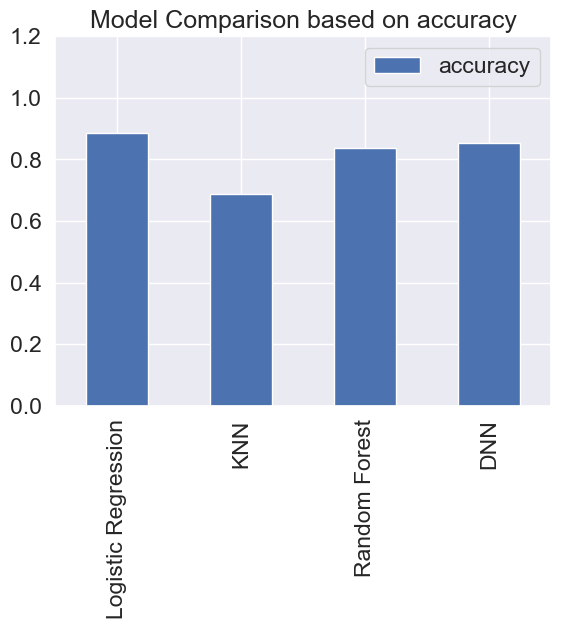

In [167]:
#Model Comparison based on accuracy
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
plt.ylim(0, 1.2)
plt.title("Model Comparison based on accuracy")

## TUNING HYPERPARAMETERS FOR THE MODELS CONSIDERED:

**Hyperparameter tuning is a critical step in the machine learning workflow which is implemented below to improve the model's performance and generalization**

**DNN HYPERPARAMETER TUNING:**

For DNN we have used Randomized search Cv for tuning the hyperparameters.

- The DNN consists of a single hidden layer with relu activation function and output layer with sigmoid activation function.
- we have considered a 'grid of batch_size': [16, 32, 64],'epochs': [10, 20, 30,'learning_rate': [0.001, 0.01, 0.1],'units': [16, 32, 64] for tuning.

In [98]:
#Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
#Defining a model
def create_model(learning_rate=0.001, units=32):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier based on the create_model function
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters and their possible values for tuning
param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'learning_rate': [0.001, 0.01, 0.1],
    'units': [16, 32, 64]
}

# Perform random search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set using the best parameters
test_accuracy = random_search.best_estimator_.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

C:\Users\Diwakar Mohan\AppData\Local\Temp\ipykernel_23440\2068061023.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


3/3 [==============================] - 0s 3ms/step
Best Hyperparameters: {'units': 32, 'learning_rate': 0.01, 'epochs': 30, 'batch_size': 16}
Test Accuracy: 0.8360655903816223


**INFERENCE:**
- The best combination parameters obtained for DNN: {'units': 32, 'learning_rate': 0.01, 'epochs': 30, 'batch_size': 16}.
- The Test accuracy for the optimised DNN model is 0.83

**KNN HYPER PARAMETER TUNING:**

In [158]:
# Let's tune KNN
train_scores = []
test_scores = []
# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)
# Setup KNN instance
knn = KNeighborsClassifier()
# Loop through different n_neighbors
for i in neighbors:
 knn.set_params(n_neighbors=i)
 
 # Fit the algorithm
 knn.fit(X_train, y_train)
 
 # Update the training scores list
 train_scores.append(knn.score(X_train, y_train))
 
 # Update the test scores list
 test_scores.append(knn.score(X_test, y_test))

**PLOTTING THE TRAIN AND THE TEST SCORE BASED ON THE NUMBER OF NEIGHBOURS TAKEN INTO ACCOUNT.**

Maximum KNN score on the test data: 75.41%


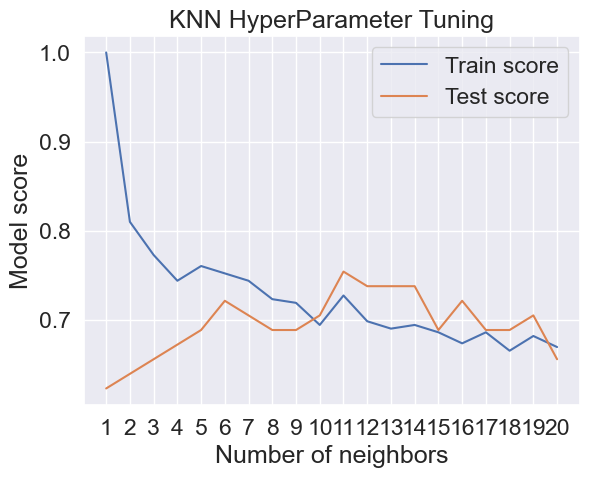

In [159]:
# Plotting the model scores for different neighbours considered
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.title("KNN HyperParameter Tuning")
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**INFERENCE:**

- From the above ouput we can infer that 6,7,8,9,10,11 neighbours can be considered because these neighbours produce maximum test score without overfitting.
- The maximum test score obtained for knn is 75.41% for 11 neighbours.

### HYPERPARAMETER TUNING FOR RANDOM FORREST USING RandomizedSearchCV

**Create a hyperparameter grid for LogisticRegression & Random Forest**

In [160]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
 "solver": ["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
 "max_depth": [None, 3, 5, 10],
 "min_samples_split": np.arange(2, 20, 2),
 "min_samples_leaf": np.arange(1, 20, 2)}

**After setting up hyperparameter grids for each of our models, let's use RandomizedSearchCV to fine-tune them.**

After setting up hyperparameter grids for each of our models, let's use RandomizedSearchCV to fine-tune them.

In [161]:
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
 param_distributions=log_reg_grid,
cv=5,
n_iter=20,
verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

**Optimised c parameter for logistic regression**

In [168]:
#Optimised best parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

**INFERENCE:**
- The optimised c parameter obtained for logistic regression is 0.23357214690901212.

**Accuracy for the tuned logistic regression model**

In [169]:
#Accuracy for the optimised Logistic Regression Model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

**INFERENCE:**
- The accuracy for the optimised logistic regression model is 0.8852459016393442

**Tuning 'n_estimators,min_samples_split','min_samples_leaf','max_depth'parameters in Random forrest**


In [ ]:
# Setup random seed
np.random.seed(42)
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
 param_distributions=rf_grid,
cv=5,
n_iter=20,
verbose=True)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


**Optimised hyperparameter values**

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

**INFERENCE:**

- The optimised n_estimators','min_samples_split','min_samples_leaf''max_depth'parameter obtained for Random Forrest regression is 210,4,19,3 respectively.

**Accuracy for the tuned Random Forrest regression model**

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

**INFERENCE:**
- The accuracy for the optimised Random Forrest regression model is 0.868.

## Hyperparamter Tuning with GridSearchCV
- Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),"solver": ["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

In [ ]:
# Check the best hyperparmaters
gs_log_reg.best_params_

**INFERENCE:**
- The optimised c parameter obtained for logistic regression is 0.20433597178569418.

In [ ]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

**INFERENCE:**
- The accuracy for the optimised logistic regression model using GridSearch is 0.8852459016393442

## Evaluting our tuned machine learning classifier for the best model obtained beyond accuracy

- ROC curve and AUC score
- Confusion matrix
- Precision
- Recall
- F1-score

**ROC curve and AUC score**

In [ ]:
#Creation of roc curve
fpr, tpr, _ = roc_curve(y_test, gs_log_reg.best_estimator_.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**INFERENCE:**

- The ROC curve answers the question: How often will a randomly chosen 1 outcome have a higher probability of being predicted to be a 1 outcome than a randomly chosen true 0?

- The larger the area under the ROC curve AUC ROC, the better is the discrimination.

- The Logistic Regression model has an AUC value of 0.93, indicating that it performs better in distinguishing patients with Heart Disease from those who do not.

**Confusion matrix**

In [ ]:
 # Confusion matrix
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
print(confusion_matrix(y_test, y_preds))

**Confusion Matrix Plot**

In [ ]:
#Confusion Matrix Plot
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
 """
 Plots a nice looking confusion matrix using Seaborn's heatmap()
 """
 fig, ax = plt.subplots(figsize=(3, 3))
 ax = sns.heatmap(confusion_matrix(y_test, y_preds),
 annot=True,
cbar=False)
 plt.xlabel("True label")
 plt.ylabel("Predicted label")
 plt.title("Confusion Matrix")
 
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 
plot_conf_mat(y_test, y_preds)


**INFERENCE:**

- TP: 25 instances were correctly predicted as positive.
- FP: 4 instances were wrongly predicted as positive when they were actually negative.
- FN: 3 instances were wrongly predicted as negative when they were actually positive.
- TN: 29 instances were correctly predicted as negative

**Calculation of accuracy, precision, recall and f1-score for the optimised logistic regression model using Cross Validation**

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
 solver="liblinear")

**Cross-validated accuracy**

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

**INFERENCE**

- The cross-validated accuracy results indicate how well the classifier is performing on different subsets of the data. The average accuracy score (approximately 0.844) gives you an estimate of the model's general performance on the entire dataset. 

- This cross-validation approach helps provide a more robust evaluation of the model's accuracy, as it considers multiple splits of the data for training and testing.

- An accuracy score of 0.844 indicates that the model is performing well in both 0 & 1 detection.

**Cross-validated precision**

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

**INFERENCE**
- The precision is a metric that assesses the proportion of positive identifications (true positives) that are actually correct. 

- In our case, the cross validated precision has been calculated using a 5-fold cross-validation. The average precision across the folds is approximately 0.82

- This states that model performs well in identifying people truly with heart disease who are classified has heart disease. 

**Cross-validated Recall**

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

**INFERENCE**
- The recall measures the proportion of actual positive instances that were correctly identified by the model (true positives).

- The cross-validated recall has been calculated using a 5-fold cross-validation. The average recall across the folds is approximately 0.92.

- This states that model performs well in classifying people with heart disease out of those who are truly people with heart disease.

**Cross-validated F1-Score**

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

**INFERENCE**

- The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's accuracy. The cross-validated F1-score has been calculated using a 5-fold cross-validation. 

- The average F1-score across the folds is approximately 0.87.

- This states that the model performs well in identifying people with heart disease and it does it accurately.

**Visualization of cross-validated metrics**

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,"Precision": cv_precision,"Recall": cv_recall,"F1": cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False);

**INFERENCE**

- From the above plot we can infer that the optimized Logistic Regression model performs well in all the evaluation metrics considered and has excellent prediction capacity.

## IDENTIFYING POTENTIAL FEATURES CONTRIBUTING TO PREDICTION OF HEART DISEASE IN THE OPTIMISED MODEL

- Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

- Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

- Let's find the feature importance for our LogisticRegression model...

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
 solver="liblinear")
clf.fit(X_train, y_train);
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);


**INFERENCE:**

- The magnitude and direction of the coefficients can provide insights into how each feature impacts the model's predictions.
- Positive coefficients suggest a positive impact on the target event, while negative coefficients suggest a negative impact.
- From the above plot we can infer that cp,restecg,slope have positive relationship with heart disease.
- Sex,exang,oldpeak,ca,thal have negative relationship with the heart disease.
- cholestrol,fbs and thalach don't contribute or have less contribution towards heart disease prediction.

## RESULT:

- We have considered 4 models namely Logistic, Random forest, KNN,DNN.Based on the evaluation of four models (Logistic Regression, Random Forest, K-Nearest Neighbour's, Deep Neural Network), after hyper parameter tuning and fitting the optimised models on balanced data, Logistic Regression(0.88) emerged as the best-performing model based on accuracy. 

- Subsequently, the evaluation of the Logistic Regression model included the following metrics to gauge its predictive capacity:
1. Area Under the ROC Curve (AUC):(0.93)
2. Recall(True Positive Rate):(0.92)
3. Precision:(0.82)
4. F1 Score:(0.86)

- These metrics collectively offer a comprehensive understanding of the model's performance across various aspects. While accuracy is a valuable metric, these additional measures give deeper insights into how well the model performs under different scenarios and classes. Based on the evaluated metrics, the Logistic Regression model's AUC, Sensitivity, Specificity, and F1 Score provide a more nuanced assessment of its predictive capacity. We may thus draw the conclusion that, when compared to other models, logistic regression has greater predictive ability.